# Leveraging Machine Learning for Breast Cancer Diagnosis 

Breast cancer remains a significant global health concern, affecting millions of individuals each year. Early and accurate diagnosis of breast cancer is pivotal for effective treatment and improved patient outcomes. In this era of advanced technology and data-driven healthcare, machine learning offers a promising solution to assist medical professionals in the timely and precise identification of breast cancer cases.

**Objective**:The objective of this project is to create a predictive model that can accurately classify breast
cancer cases as benign or malignant based on a set of relevant features. By leveraging
historical data and applying machine learning techniques, we aim to develop a reliable tool for
assisting medical professionals in diagnosing breast cancer.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import data 

In [42]:
data=pd.read_csv("C:/Users/AJVAD K/Desktop/Internship/coders cave/data.csv")

In [43]:
data.head()

,id,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
data.shape

(569, 32)

In [45]:
data.columns

Index(['id', 'diagnosis', 'Radius_mean', 'Texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [46]:

df=data.drop("id",axis=1)

In [47]:
df.head()

,diagnosis,Radius_mean,Texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
data.isnull().sum()

id                         0
diagnosis                  0
Radius_mean                0
Texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Convert diagnosis data to numerical

In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])

# 'benign' will be encoded as 0, and 'malignant' as 1

## Standard scaling


In [53]:
from sklearn.preprocessing import StandardScaler
numerical_features = df.drop(columns=['diagnosis'])
scaler = StandardScaler()
df[df.columns.difference(['diagnosis'])] = scaler.fit_transform(numerical_features)

## Exploratory data analysis

In [55]:
df.corr()["diagnosis"].sort_values(ascending=False)

diagnosis                  1.000000
symmetry_worst             0.793566
smoothness_mean            0.782914
compactness_worst          0.776614
radius_se                  0.776454
area_mean                  0.742636
smoothness_se              0.733825
Radius_mean                0.730029
area_se                    0.708984
compactness_se             0.696360
symmetry_se                0.659610
compactness_mean           0.596534
symmetry_mean              0.590998
concave points_worst       0.567134
concavity_se               0.556141
concavity_worst            0.548236
radius_worst               0.456903
smoothness_worst           0.421465
Texture_mean               0.417232
texture_se                 0.416294
perimeter_mean             0.408042
area_worst                 0.358560
concave points_mean        0.330499
texture_worst              0.323872
fractal_dimension_se       0.292999
fractal_dimension_worst    0.253730
perimeter_worst            0.077972
perimeter_se              -0

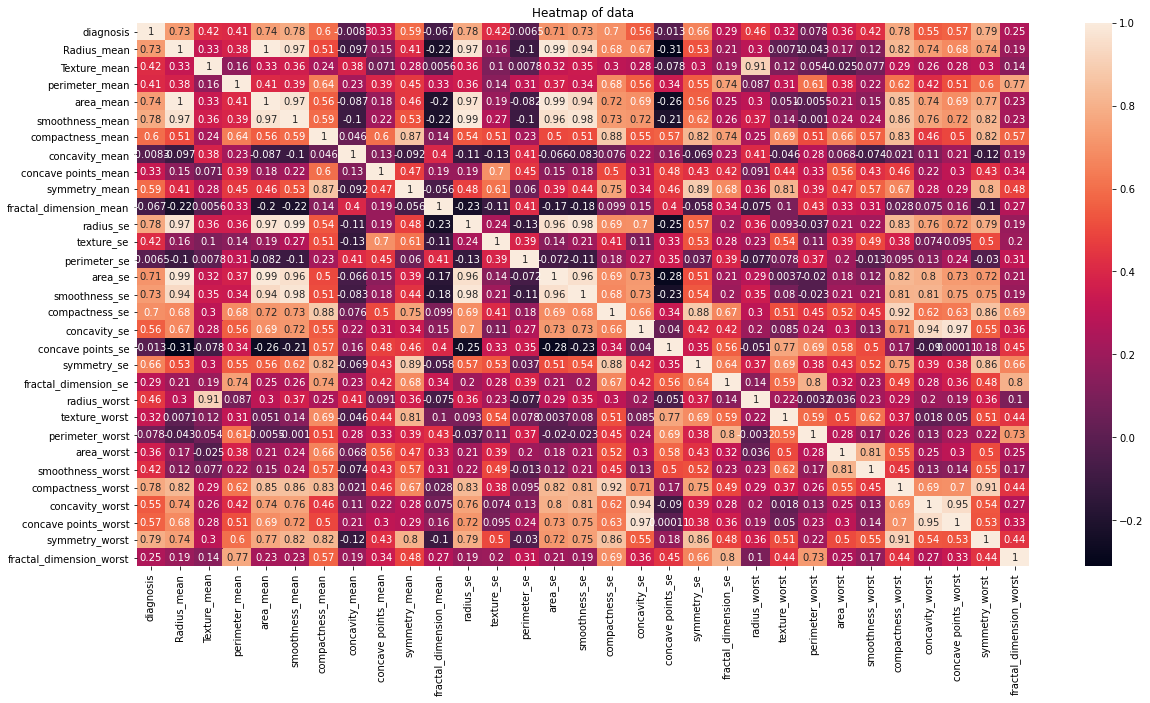

In [57]:
import seaborn as sns
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(),annot=True)
plt.title("Heatmap of data")
plt.show()


In [58]:
types=df["diagnosis"].value_counts()
types

0    357
1    212
Name: diagnosis, dtype: int64

Text(0, 0.5, 'Value counts')

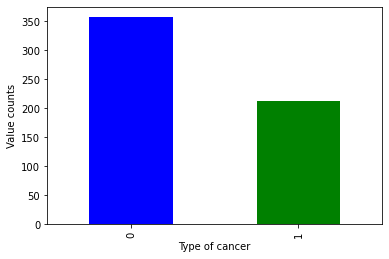

In [59]:
types.plot(kind="bar",color=["blue","green"])
plt.xlabel("Type of cancer")
plt.ylabel("Value counts")

In [60]:
percentage=(types/(types.sum()))*100
percentage

0    62.741652
1    37.258348
Name: diagnosis, dtype: float64

## Outlier detection

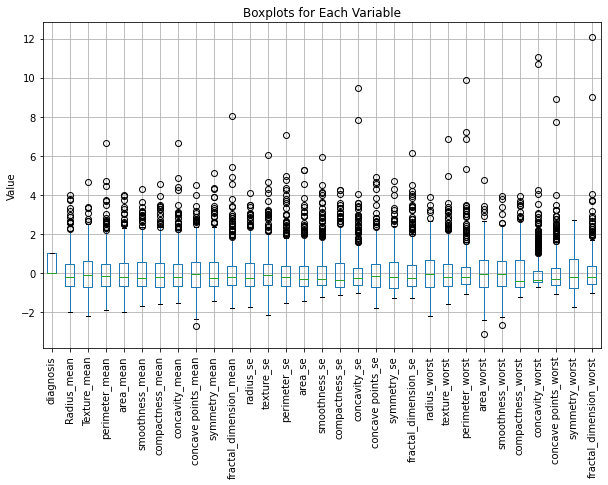

In [61]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
df.boxplot()
plt.title('Boxplots for Each Variable')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

In [62]:
x=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

## Handling with outlires
We have to use  "Winsorizing" technique, which caps or truncates extreme values to reduce their impact without removing them entirely. 

In [63]:
from scipy import stats

# Set a threshold for Winsorizing
threshold = 90

# Apply Winsorizing to each column
for col in x.columns:
    lower_threshold = np.percentile(x[col], (100 - threshold) / 2)
    upper_threshold = np.percentile(x[col], 100 - (100 - threshold) / 2)
    x[col] = np.clip(x[col], lower_threshold, upper_threshold)

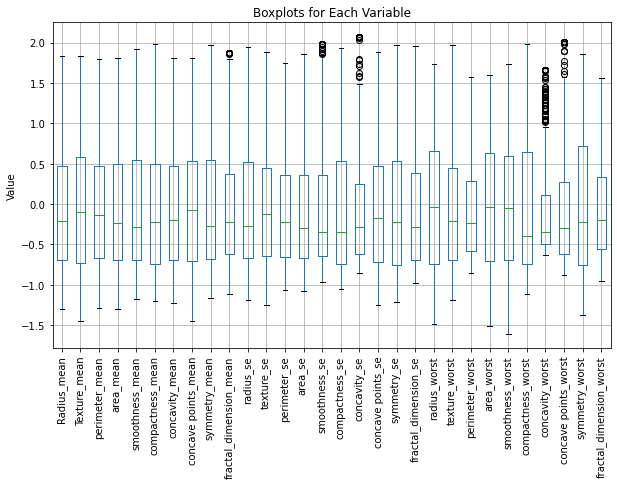

In [64]:
plt.figure(figsize=(10, 6))  
x.boxplot()
plt.title('Boxplots for Each Variable')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

## PCA

In [65]:
from sklearn.decomposition import PCA

In [66]:
n_components = 10  
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(x)
pca_df = pd.DataFrame(data=X_pca, columns=[f'PC{i}' for i in range(1, n_components + 1)])


In [67]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,7.662318,1.936758,-1.571873,2.710545,-0.735838,1.244100,1.726133,0.303542,0.271855,-0.894537
1,2.726621,-3.760389,-0.600452,0.526743,-0.010567,0.019873,0.618854,0.500507,0.101654,1.076880
2,5.872076,-0.894441,-0.467987,0.957395,-0.445425,0.608002,-0.426401,0.115781,-0.152737,0.273806
3,4.407696,5.768638,-0.569204,-0.183244,0.131676,1.008764,-0.507205,0.359440,0.071611,-0.443444
4,4.004440,-1.829651,0.231792,3.426876,-0.147236,-1.338684,-0.371676,0.740058,-0.155824,0.720593


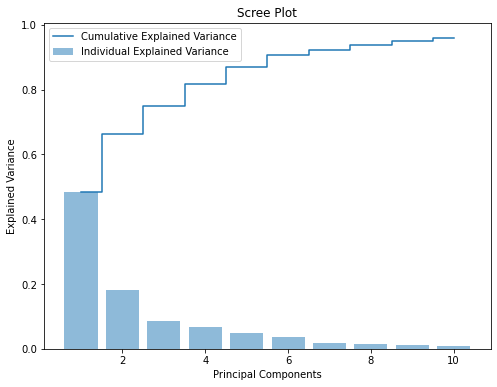

In [68]:
# Calculate the explained variance for each component in 'pca_df'
explained_variance = pca.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot')
plt.legend()
plt.show()

In [70]:
X_pca=pca_df
X_pca.shape

(569, 10)

## Modeling


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Assuming 'X_pca' contains your feature set and 'y' contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Initialize and train each model
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate accuracy and precision
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall=recall_score(y_test,y_pred)
    results[model_name] = {"Accuracy": accuracy, "Precision": precision,"Recall":recall}

# Print the results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print()

Model: Logistic Regression
Accuracy: 0.9883
Precision: 0.9841
Recall: 0.9841

Model: Decision Tree
Accuracy: 0.9298
Precision: 0.8923
Recall: 0.9206

Model: Random Forest
Accuracy: 0.9532
Precision: 0.9365
Recall: 0.9365

Model: SVM
Accuracy: 0.9708
Precision: 0.9531
Recall: 0.9683

Model: K-Nearest Neighbors
Accuracy: 0.9591
Precision: 0.9516
Recall: 0.9365



Accuracy measures the overall correctness of our model's predictions.
Higher accuracy is generally better, but it may not tell the whole story, especially in imbalanced datasets.
It's a good starting point for model evaluation.<br><br>Precision is the ratio of true positive predictions to the total number of positive predictions.
Precision is important when minimizing false positives is a priority (e.g., in medical diagnosis, where a false positive can lead to unnecessary treatment).
A higher precision indicates fewer false positives.<br><br>
Recall is the ratio of true positive predictions to the total number of actual positives in the dataset.
Recall is important when minimizing false negatives is crucial (e.g., in medical diagnosis, where missing a true positive can be life-threatening).
A higher recall indicates fewer false negatives.<br><br>
A **logistic regression model** with an accuracy of 0.9883, precision of 0.9841, and recall of 0.9841 appears to be performing very well on our breast cancer classification task. In medical cases, we have to give more importance to **highly accurate and highly recall valued models**.



## Cross validation


In [73]:
from sklearn.model_selection import cross_val_score
model = LogisticRegression()  # Replace with your chosen model

# Perform 5-fold cross-validation (you can adjust the 'cv' parameter)
cv_scores = cross_val_score(model, X_pca, y, cv=5, scoring='accuracy')  # You can also use other scoring metrics

# Print the cross-validation scores
print("Cross-Validation Scores:")
print(cv_scores)
print(f"Mean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross-Validation Scores:
[0.98245614 0.95614035 0.99122807 0.97368421 0.98230088]
Mean Accuracy: 0.9772
Standard Deviation: 0.0119


Perform cross-validation to assess the model's performance on multiple subsets of our data. This helps ensure that the model's performance is consistent and not just a result of a particular data split.

A mean accuracy of 0.9772 is a very good result, indicating that our model performs well in distinguishing between benign and malignant cases in our breast cancer classification task. The standard deviation of 0.0119 is relatively low, suggesting that the model's performance is consistent across different data subsets during cross-validation.

## Conclution
In conclusion, the logistic regression model we have developed exhibits strong diagnostic capabilities for breast cancer classification. Its high accuracy, precision, and recall, combined with its interpretability, make it a promising candidate for aiding healthcare professionals in breast cancer diagnosis.<br><br>The results we obtained were highly promising. With a mean accuracy of 97.72% and a standard deviation of 1.19%, the logistic regression model demonstrated exceptional consistency and reliability. This underscores its potential as a valuable tool for medical professionals.<br><br>Moreover, our model achieved a precision of 98.41% and a recall of 98.41%. This balanced combination of precision and recall is pivotal in the context of breast cancer diagnosis, where the consequences of both false positives and false negatives can be significant. It means that our logistic regression model excels at minimizing both types of errors, making it a well-rounded and effective diagnostic tool.